In [195]:
%autosave 60

Autosaving every 60 seconds


In [3]:
## importing the libraries
import numpy as np
import pandas as pd
#import random_csv_selector
#from preprocess import data_preprocessor
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import LabelEncoder
import scipy.stats as sps
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams["figure.figsize"] = (10, 10)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 200)
sns.set_style("darkgrid")

In [5]:
data = pd.read_csv("EDA_Data_01.csv")

In [6]:
data.head()

,Unnamed: 0,index,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,0,0,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,0,1543193200380,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
1,1,1,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,100,1543193200480,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
2,2,2,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,200,1543193200580,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,183,-48,67,155,71,17,188,-38,512.0,-0.1,0,0.0,0.0,266,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,16,16,0,39,13.8,0,0.0,34.75,26.1,0,-65532,0,2217,15.5,1,14.9,4.0,65,1,0,3920,3920,3920,138,0,684.0,-789.0,-135.0,NaN
3,3,3,DEFREG:352891066263282,1,NaN,77.072211,28.497356,2.0,300,1543193200680,77.072211,28.497356,88.0052,1104361843,5,30.0,16.3,3,352891066263282,Trip not started,P,M1_POCEV.0,NaN,1,1191,0.0,78,10,0,0,1,0.0,1,13.9,0,58.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.25,0.25,4.01,4.01,89.8,89.8,89.3,89.3,100,18.0,18.0,18.0,17.5,17.5,17.5,0.5,8.75,5.5,264.5,255.25,255.0,1810.0,1810,100.0,99.9,16,205,58,17,18

In [25]:
data.mo.unique()

array(['DEFREG:352891066263282', 'DEFREG:352891066262722',
       'DEFREG:358272088699072'], dtype=object)

---

In [6]:
def trip_data(data, trip_number, col_1, col_2):
    """
    This function returns a particular trip data, with EVSMA_Smoothened and Delta EVSMA. along with the column for 
    efficient comparision.
    """
    trip_df = data[data["tp"] == trip_number]
    trip_df = trip_df["EVSMA_MAX"].to_frame()
    span = 600
    alpha = 2/(1 + span)
    trip_df["EVSMA_EWMA"] = np.nan
    trip_df["EVSMA_EWMA"].iloc[0] = trip_df["EVSMA_MAX"].iloc[0]
    
    for i in range(1, len(trip_df)):
        temp = (trip_df["EVSMA_MAX"].iloc[i]*alpha) + (trip_df["EVSMA_EWMA"].iloc[i-1]*(1-alpha))
        trip_df["EVSMA_EWMA"].iloc[i] = temp
    
    trip_df["EVSMA_Shift"] = trip_df["EVSMA_EWMA"].shift(periods = 1)
    trip_df["EVSMA_Shift"].iloc[0] = trip_df["EVSMA_EWMA"].iloc[0]
    trip_df["EVSMA_EWMA"] = abs(trip_df["EVSMA_EWMA"] - trip_df["EVSMA_Shift"])
    
    trip_df[col_1] = data[data["tp"] == trip_number][col_1]
    trip_df[col_2] = data[data["tp"] == trip_number][col_2]
    
    df = trip_df[[col_1, col_2, "EVSMA_MAX", "EVSMA_EWMA"]][600:]
    
    return df

In [7]:
def relative_corr(data, col_1, col_2):
    """
    This function returns the Correlation dataframe of target variable with two attributes
    """
    corr_1 = []
    corr_2 = []
    corr_3 = []
    length = []
    for i in range(0, len(list(data["tp"].unique()))):
        trip_t = data[data["tp"] == i+1]
        trip_t = trip_t["EVSMA_MAX"].to_frame()
        span = 600
        alpha = 2/(1 + span)
        trip_t['EVSMA_EWMA'] = np.nan
        trip_t['EVSMA_EWMA'].iloc[0] = trip_t["EVSMA_MAX"].iloc[0]
        
        for j in range(1, len(trip_t)):
            temp = (trip_t["EVSMA_MAX"].iloc[j]*alpha) + (trip_t["EVSMA_EWMA"].iloc[j-1]*(1-alpha))
            trip_t["EVSMA_EWMA"].iloc[j] = temp
            
        trip_t["EVSMA_Shift"] = trip_t["EVSMA_EWMA"].shift(periods = 1)
        trip_t["EVSMA_Shift"].iloc[0] = trip_t["EVSMA_EWMA"].iloc[0]
        trip_t["EVSMA_delta"] = abs(trip_t["EVSMA_EWMA"] - trip_t["EVSMA_Shift"])
        
        trip_t[col_1] = data[data["tp"] == i+1][col_1]
        trip_t[col_2] = data[data["tp"] == i+1][col_2]
        
        temp_data = trip_t[[col_1, col_2, "EVSMA_MAX", "EVSMA_EWMA"]][600:]
        c1 = temp_data[col_1].corr(temp_data["EVSMA_MAX"])
        c2 = temp_data[col_2].corr(temp_data["EVSMA_MAX"])
        c3 = temp_data[col_1].corr(temp_data[col_2])
        l = len(temp_data)
        #v = temp_data.IMEI.iloc[0]
        #print(c1, c2, c3)
        
        corr_1.append(round(c1, 2))
        corr_2.append(round(c2, 2))
        corr_3.append(round(c3, 2))
        length.append(l)
        
        a = col_1 + " & SMA_MAX"
        b = col_2 + " & SMA_MAX"
        ab = col_1 + " & " + col_2
    
    SMA_corr = pd.DataFrame({
        "Length": length,
        a: corr_1,
        b: corr_2,
        ab: corr_3
    })
    
    return SMA_corr

In [8]:
def corr_scatterplot(data):
    """
    this function plots the scatter plot of length of the trip vs correlation of attribute with EVSMA_MAX
    """
    label_1 = data.columns[1]
    label_2 = data.columns[2]
    label_3 = data.columns[3]
    sns.scatterplot(x = data["Length"], 
                    y = data.iloc[:, 1], 
                    color = "red", 
                    label = label_1)
    sns.scatterplot(x = data["Length"], 
                    y = data.iloc[:, 2], 
                    color = "black", 
                    label = label_2)
    sns.scatterplot(x = data["Length"], 
                    y = data.iloc[:, 3], 
                    color = "blue", 
                    label = label_3)
    plt.show()

In [10]:
def eval_pdf(rv, num = 4):
    mean, std_dev = rv.mean(), rv.std()
    xs = np.linspace(mean - (num*std_dev), mean+(num*std_dev), 100)
    ys = rv.pdf(xs)
    return xs, ys

In [11]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group1)
    var1, var2 = group1.var(), group2.var()
    pooled_var = ((n1*var1) + (n2*var2))/(n1 + n2)
    d = diff/np.sqrt(pooled_var)
    return d

In [12]:
def overlap_superiority(control, treatment, n = 1000):
    """
    Estimates overlap and superiority based on the sample
    control - rv object
    treatment - rv object
    n: samples
    """
    control_samples = control.rvs()
    treatment_samples = treatment.rvs()
    threshold = (control.mean() + treatment.mean())/2
    control_above = sum(control_samples > threshold)
    treatment_below = sum(treatment_samples < threshold)
    overlap = (control_above + treatment_below)/n
    superiority = (treatment_samples > control_samples).mean()
    return overlap, superiority

In [13]:
def plot_pdfs(cohen_d):
    """
    plot PDFs for distributions that differ by some number of standard deviations
    cohen_d: number of standard deviations between the mean
    """
    control = sps.norm(0, 1)
    treatment = sps.norm(cohen_d, 1)
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label = "control", color = "blue", alpha = 0.7)
    
    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label = "treatment", color = "red", alpha = 0.7)
    
    #o, s = overlap_superiority(control, treatment)
    #plt.text(0, 0.05, "overlap" + str(o))
    #plt.text(0, 0.15, "superioty" + str(s))
    plt.legend()
    plt.show()

---

## EVPWA_MIN (Power Required for running compressor) and EVPWA_MAX (Power Required for running compressor Max)

In [207]:
temp_df = trip_data(data, 31, "EVPWA_MIN", "EVPWA_MAX") 

In [208]:
temp_df.sample(5)

,EVPWA_MIN,EVPWA_MAX,EVSMA_MAX,EVSMA_EWMA
487131,0.10,0.10,50.1,0.000333
466811,0.15,0.15,67.3,0.001116
467556,0.15,0.15,66.5,0.001665
451607,0.15,0.15,79.5,0.000826
488771,0.10,0.10,48.7,0.000459


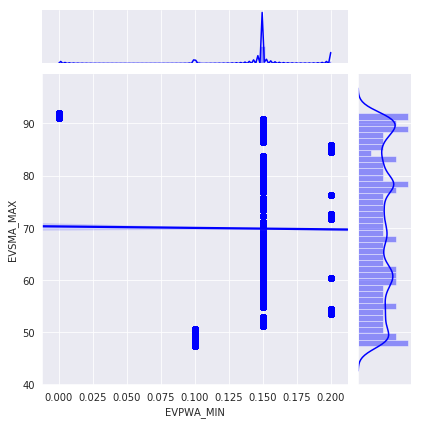

In [209]:
sns.jointplot(x = temp_df["EVPWA_MIN"], y = temp_df["EVSMA_MAX"], kind = "reg", color = "blue")
plt.show()

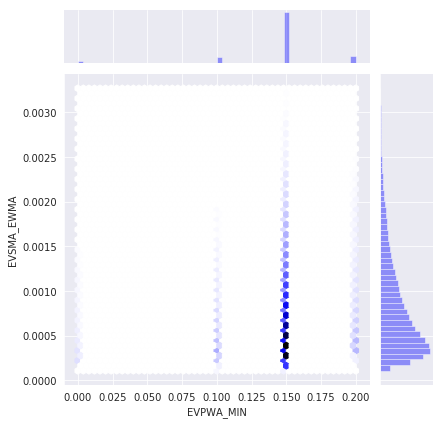

In [210]:
sns.jointplot(x = temp_df["EVPWA_MIN"], y = temp_df["EVSMA_EWMA"], kind = "hex", color = "blue")
plt.show()

The above plots doesn't give us much insight about the way EVPWA_MIN is affecting the EVSMA or EVSMA_delta. This predictor doesn't look to have much power as the value of stays constant for the whole trip.

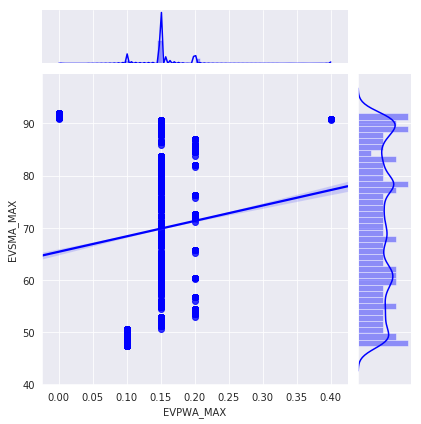

In [211]:
sns.jointplot(x = temp_df["EVPWA_MAX"], y = temp_df["EVSMA_MAX"], kind = "reg", color = "blue")
plt.show()

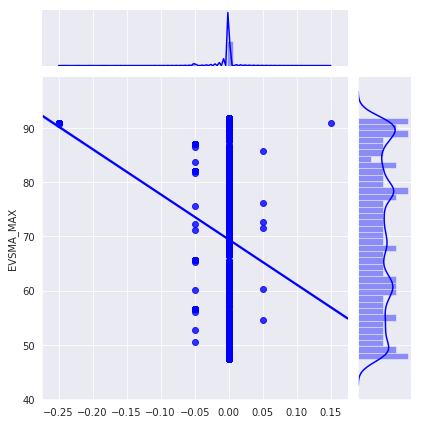

In [212]:
sns.jointplot(x = temp_df["EVPWA_MIN"] - temp_df["EVPWA_MAX"], y = temp_df["EVSMA_MAX"], kind = "reg", color = "blue")
plt.show()

In [213]:
temp_corr_data = relative_corr(data, "EVPWA_MAX", "EVPWA_MIN")

In [214]:
temp_corr_data[temp_corr_data["Length"] > 20000]

,Length,EVPWA_MAX & SMA_MAX,EVPWA_MIN & SMA_MAX,EVPWA_MAX & EVPWA_MIN
1,24600,-0.61,-0.54,0.86
2,23400,0.43,0.19,0.64
7,23400,-0.88,-0.88,0.83
15,65400,0.59,0.62,0.84
22,72000,-0.38,-0.38,0.92
26,30600,-0.12,-0.19,0.44
27,30000,-0.01,0.11,0.19
28,39000,0.48,0.60,0.72
29,25200,0.08,0.10,0.15
30,55200,0.10,-0.01,0.79


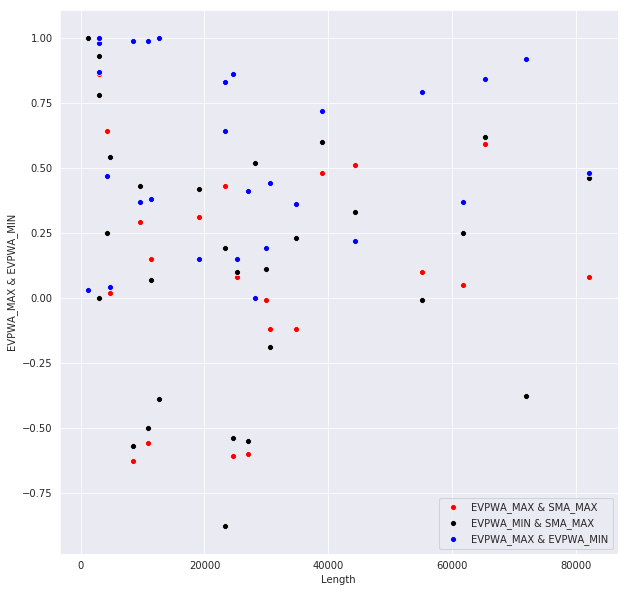

In [215]:
corr_scatterplot(temp_corr_data)

There isn't much **stable** correlation between the the EVPWA_MAX and SMA_MAX and EVPWA_MIN and SMA_MAX. By stable correlation we mean that sometimes correlation b/w PWA_MAX and SMA_MAX is `-0.88` and in another trip (of almost same length (check index 2 and 7 in *temp_corr_data*)), correlation is `0.43`.  This is because  car is driven in the winters, maybe that's why we are unable to capture the performance of PWA with SMA. 

---

## EVMCV_MAX (BMS Min Cell Voltage) and EVMCV_MIN (BMS Min Cell Voltage)

In [216]:
temp_df = trip_data(data, 29, "EVMCV_MIN", "EVMCV_MAX") 

In [217]:
temp_df.sample(5)

,EVMCV_MIN,EVMCV_MAX,EVSMA_MAX,EVSMA_EWMA
390264,3.960,3.965,84.9,0.000478
387934,3.970,3.970,86.2,0.000099
396850,3.895,3.905,81.0,0.000332
387778,3.970,3.970,86.2,0.000167
393895,3.915,3.925,82.3,0.000500


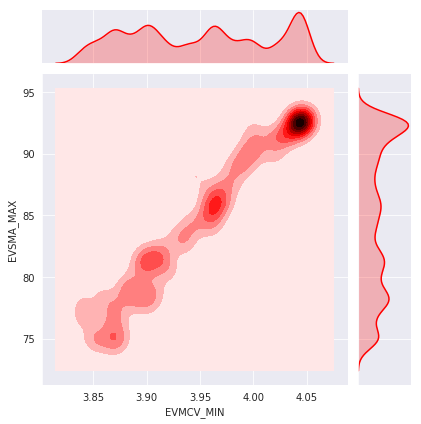

In [218]:
sns.jointplot(x = temp_df["EVMCV_MIN"], y = temp_df["EVSMA_MAX"], kind = "kde", color = "red")
plt.show()

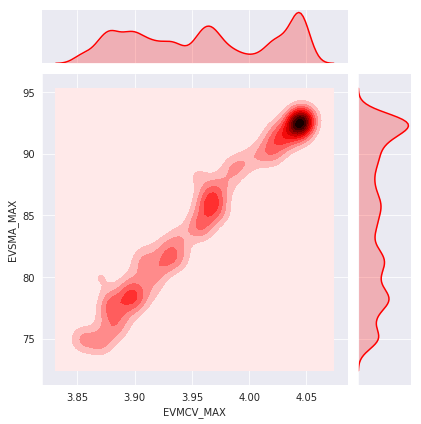

In [219]:
sns.jointplot(x = temp_df["EVMCV_MAX"], y = temp_df["EVSMA_MAX"], kind = "kde", color = "red")
plt.show()

The Plot of `EVMCV_MAX` and `EVMCV_MIN` are almost same, means they are providing same info to the model. We can choose one of these features, for prediction purposes.

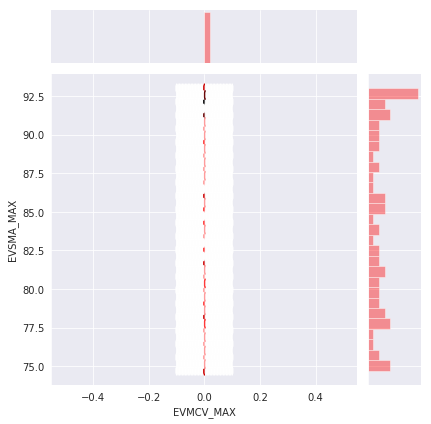

In [220]:
sns.jointplot(x = temp_df["EVMCV_MAX"] - temp_df["EVMCV_MAX"], y = temp_df["EVSMA_MAX"], kind = "hex", color = "red")
plt.show()

The plot of `EVMCV_MAX - EVMCV_MIN` against `EVSMA_MAX` is providing no info as most of the values of are in same window and that behaviour is same over the course of battery drainage.

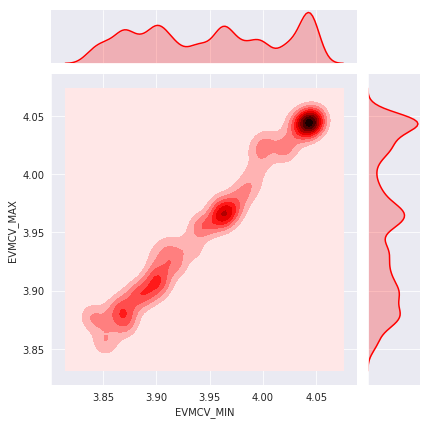

In [221]:
sns.jointplot(x = temp_df["EVMCV_MIN"], y = temp_df["EVMCV_MAX"], kind = "kde", color = "red")
plt.show()

In [222]:
temp_corr_data = relative_corr(data, "EVMCV_MAX", "EVMCV_MIN")

In [223]:
temp_corr_data

,Length,EVMCV_MAX & SMA_MAX,EVMCV_MIN & SMA_MAX,EVMCV_MAX & EVMCV_MIN
0,0,NaN,NaN,NaN
1,24600,0.96,0.94,0.98
2,23400,0.88,0.75,0.90
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,3000,-0.78,-0.78,1.00
7,23400,0.96,0.87,0.96
8,11400,0.89,0.73,0.92
9,19198,0.90,0.56,0.72


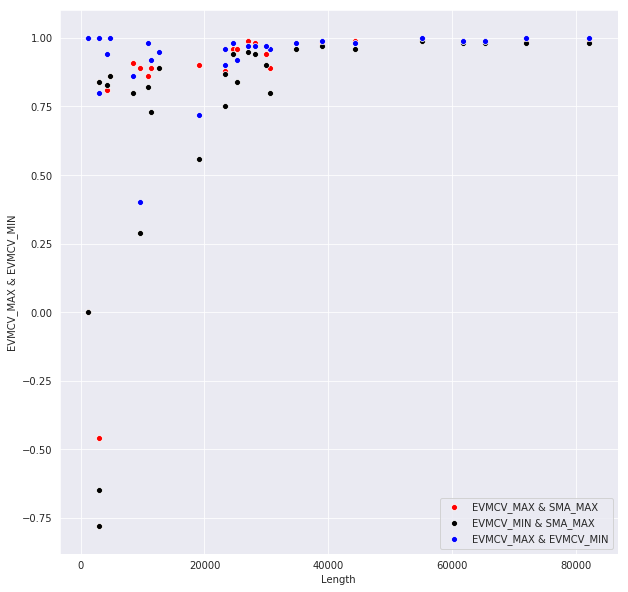

In [224]:
corr_scatterplot(temp_corr_data)

`EVMCV_MIN` and `MAX` are very highly correlated to `SMA_MAX`. One of `EVMCV_MAX` and `EVMCV_MIN`, can be selected.

---

## EVICO_Latest (Invertor Coolant temperature) and EVICO_MAX (Invertor Coolant temperature)

In [225]:
temp_df = trip_data(data, 23, "EVICO_Latest", "EVICO_Max") 

In [226]:
temp_df.sample(5)

,EVICO_Latest,EVICO_Max,EVSMA_MAX,EVSMA_EWMA
283963,75,-19,45.9,0.000226
244191,78,-19,73.5,0.000185
254270,76,-19,67.6,0.000528
248723,77,-19,70.7,0.000317
263406,77,155,60.9,0.002718


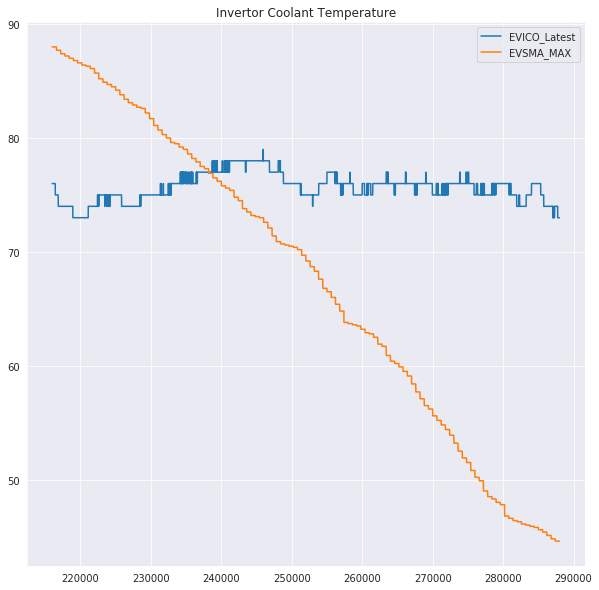

In [227]:
plt.plot(temp_df["EVICO_Latest"], label = "EVICO_Latest")
#plt.plot(temp_df["EVICO_Max"], label = "EVICO_Max")
plt.plot(temp_df["EVSMA_MAX"], label = "EVSMA_MAX")
#plt.plot(data[data["tp"] == 23]["EVVSP"], label = "VVSP")
plt.legend()
plt.title("Invertor Coolant Temperature")
plt.show()

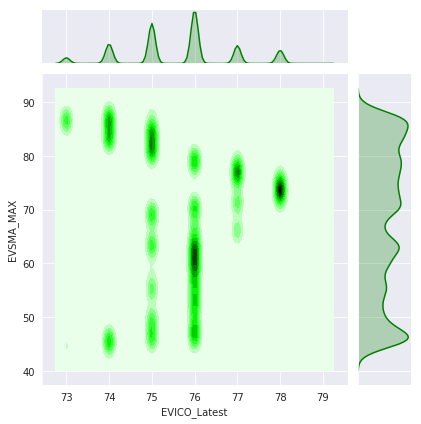

In [228]:
sns.jointplot(x = temp_df["EVICO_Latest"], y = temp_df["EVSMA_MAX"], kind = "kde", color = "green")
plt.show()

The EVICO is going up as the EVSMA comes down. It has an inverse relationship with the EVSMA. 

In [229]:
temp_df = trip_data(data, 41, "EVICO_Latest", "EVICO_Max") 

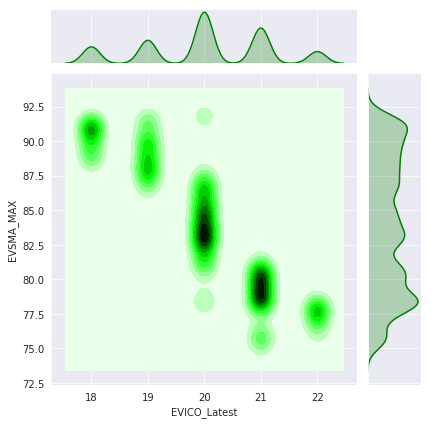

In [230]:
sns.jointplot(x = temp_df["EVICO_Latest"], y = temp_df["EVSMA_MAX"], kind = "kde", color = "green")
plt.show()

Again same realtionship is there. This trip is from different vehicle from different month.

In [231]:
temp_corr_data = relative_corr(data, "EVICO_Latest", "EVICO_Min")

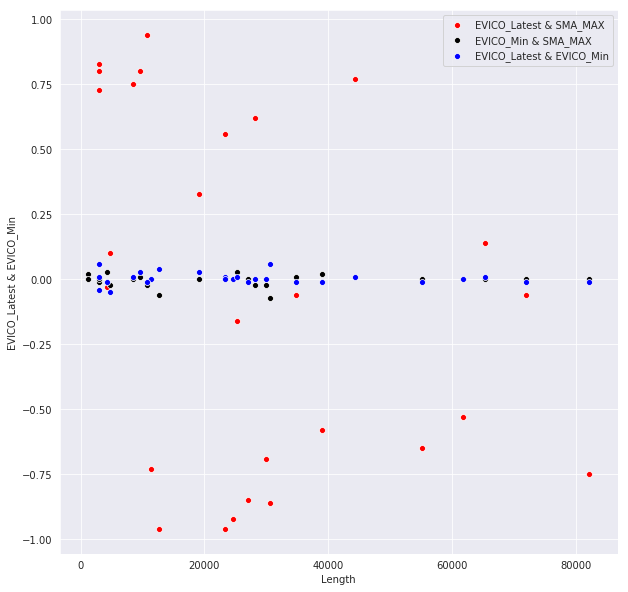

In [232]:
corr_scatterplot(temp_corr_data)

The `EVICO_Min` has zero relatioship with the `SMA_MAX`. While, `EVICO_Latest` is showing variable results in the correlation matrix. More analysis is needed.

---

## EVIDC (INV DC Current)

In [233]:
temp_df = trip_data(data, 36, "EVIDC", "EVBOA_AVG") 

In [234]:
temp_df.sample(5)

,EVIDC,EVBOA_AVG,EVSMA_MAX,EVSMA_EWMA
615226,496.75,-12.75,78.2,0.000582
610992,514.75,2.75,80.0,0.000027
621847,514.75,3.75,74.8,0.000551
609735,524.25,36.75,80.1,0.000215
619424,517.00,5.25,76.7,0.000519


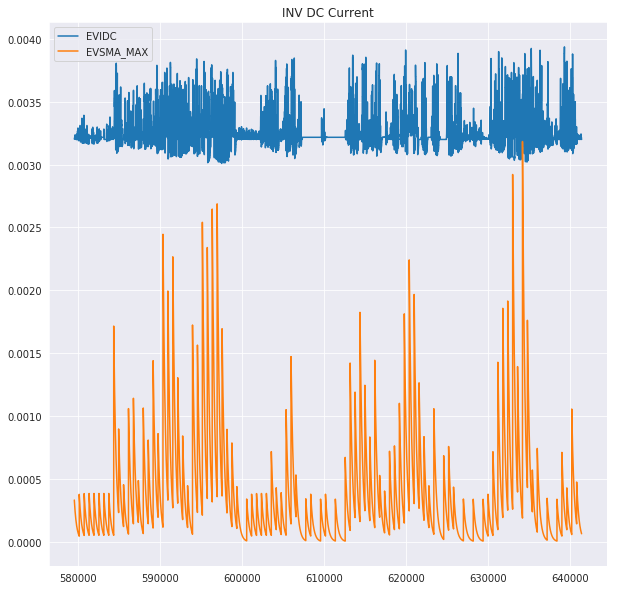

In [235]:
plt.plot(temp_df["EVIDC"]/160000, label = "EVIDC") # divided by a number for scaling purposes
plt.plot(temp_df["EVSMA_EWMA"], label = "EVSMA_MAX")
plt.legend()
plt.title("INV DC Current")
plt.show()

The fluctuations in EVIDC are reflected in the EVSMA_MAX. 

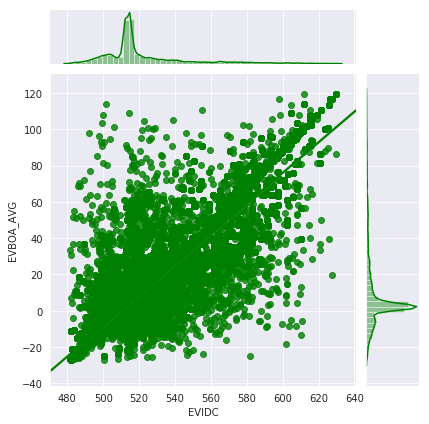

In [236]:
sns.jointplot(x = temp_df["EVIDC"], y = temp_df["EVBOA_AVG"], kind = "reg", color = "green")
plt.show()

In [237]:
temp_df["EVIDC"].corr(temp_df["EVBOA_AVG"])

0.9019745997939855

In [238]:
temp_corr_data = relative_corr(data, "EVIDC", "EVBOA_AVG")

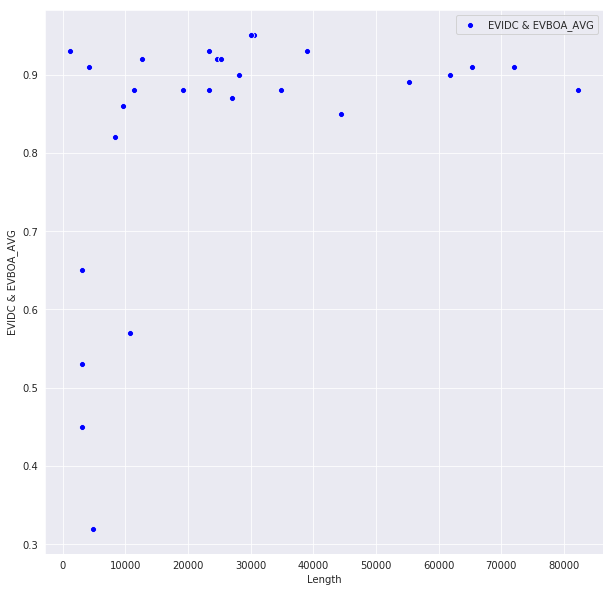

In [239]:
sns.scatterplot(x = temp_corr_data["Length"],
                y = temp_corr_data["EVIDC & EVBOA_AVG"],
                color = "blue",
                label = "EVIDC & EVBOA_AVG"
               )
plt.show()

The `EVIDC` and `EVBOA_AVG` consistently has correlation above 0.8, hence enjoying a very positive relationship with `EVBOA_AVG`

---
## EVMGT (MG1 Torque Actual) and EVTRQ (Torque Request Value)

In [240]:
temp_df = trip_data(data, 8, "EVMGT", "EVTRQ") 

In [241]:
temp_df.sample(5)

,EVMGT,EVTRQ,EVSMA_MAX,EVSMA_EWMA
78436,64.1,63.8,72.7,0.000178
75997,-16.1,-16.0,73.3,0.000122
58206,-3.6,-2.0,84.4,0.000424
77661,21.3,18.7,72.9,0.000301
76673,6.8,6.7,73.2,0.000082


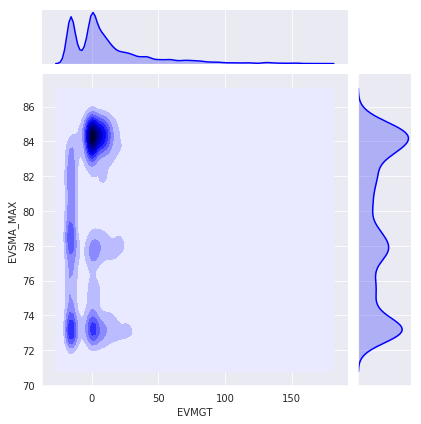

In [242]:
sns.jointplot(x = temp_df["EVMGT"], y = temp_df["EVSMA_MAX"], kind = "kde", color = "blue")
plt.show()

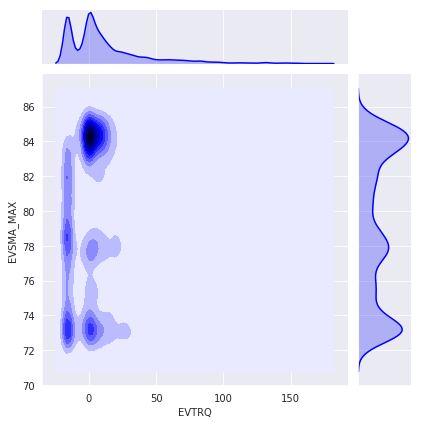

In [243]:
sns.jointplot(x = temp_df["EVTRQ"], y = temp_df["EVSMA_MAX"], kind = "kde", color = "blue")
plt.show()

`EVTRQ` and `EVMGT` have the same distribution with the label column. Hence, one of these two could be chosen.

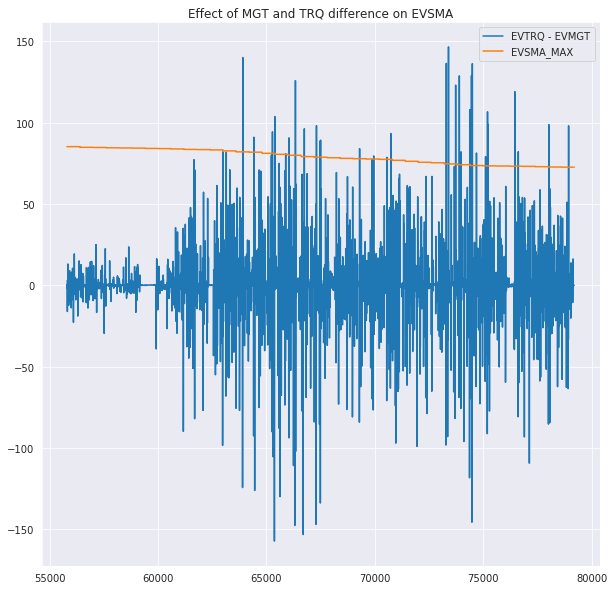

In [244]:
plt.plot(temp_df["EVTRQ"] - temp_df["EVMGT"], label = "EVTRQ - EVMGT")
plt.plot(temp_df["EVSMA_MAX"], label = "EVSMA_MAX")
plt.legend()
plt.title("Effect of MGT and TRQ difference on EVSMA")
plt.show()

In [245]:
temp_df[temp_df["EVTRQ"] - temp_df["EVMGT"] > 100]

,EVMGT,EVTRQ,EVSMA_MAX,EVSMA_EWMA
63910,-10.6,129.4,82.0,0.000811
65390,41.8,145.5,81.1,0.000344
66340,5.4,131.2,79.9,0.000744
73300,0.4,136.8,74.6,0.001796
73400,-2.0,144.5,74.6,0.001287
73730,25.9,148.9,74.6,0.000428
73900,-13.4,115.3,74.1,0.001435
74380,1.1,109.0,74.1,0.000290
74460,-0.4,128.5,73.6,0.001584
74500,12.6,148.8,73.6,0.001386


In [246]:
temp_corr_data = relative_corr(data, "EVTRQ", "EVMGT")

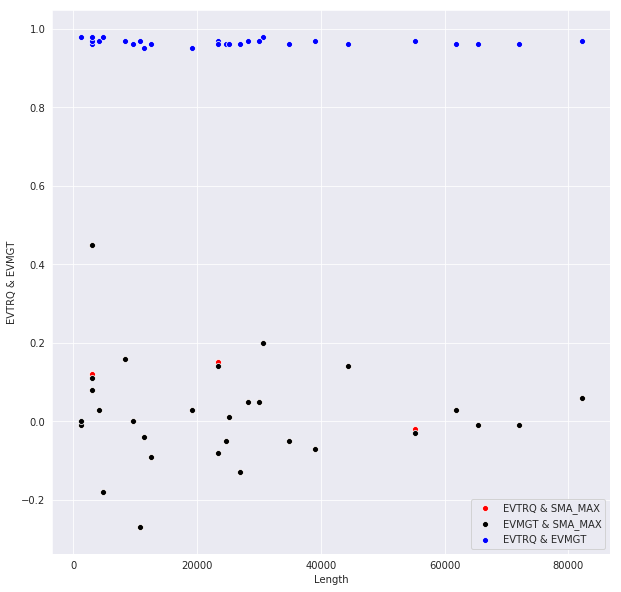

In [247]:
corr_scatterplot(temp_corr_data)

Because, MGT has consistently very high correlation with EVTRQ, we can drop one of these.

---
## EVACS (Acceleration Sensor Value) and EVACP (Acceleration Position)

In [248]:
temp_df = trip_data(data, 36, "EVACS", "EVACP") 

In [249]:
temp_df.sample(5)

,EVACS,EVACP,EVSMA_MAX,EVSMA_EWMA
585550,0.0000,0.0000,90.9,0.000143
640515,0.5000,47.8431,68.2,0.000367
613373,-0.8125,0.0000,79.3,0.000794
619623,-0.3125,0.0000,76.7,0.000267
624466,-0.1250,0.0000,74.2,0.000030


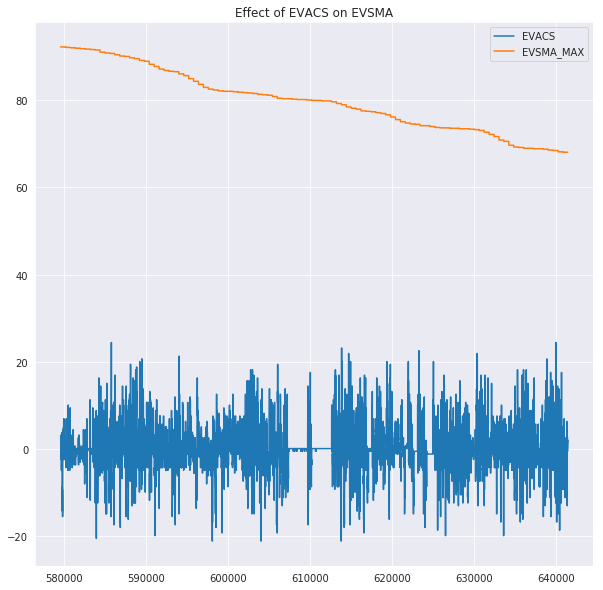

In [250]:
plt.plot(temp_df["EVACS"]*10, label = "EVACS")
plt.plot(temp_df["EVSMA_MAX"], label = "EVSMA_MAX")
plt.legend()
plt.title("Effect of EVACS on EVSMA")
plt.show()

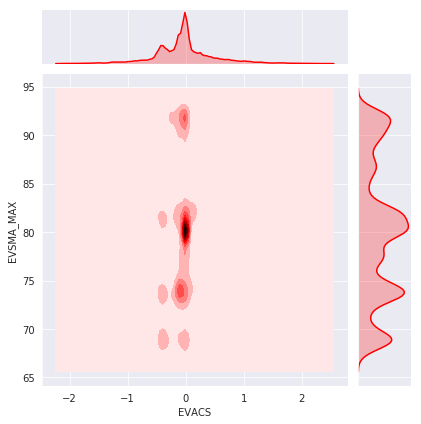

In [251]:
sns.jointplot(x = temp_df["EVACS"], y = temp_df["EVSMA_MAX"], kind = "kde", color = "red")
plt.show()

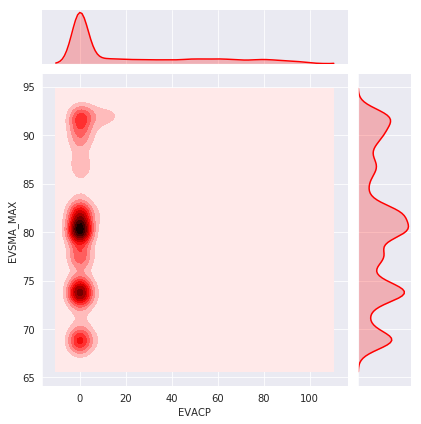

In [252]:
sns.jointplot(x = temp_df["EVACP"], y = temp_df["EVSMA_MAX"], kind = "kde", color = "red")
plt.show()

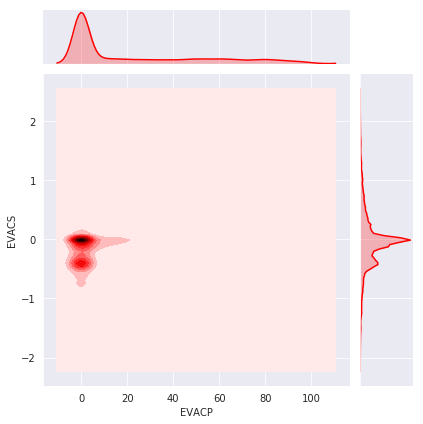

In [253]:
sns.jointplot(x = temp_df["EVACP"], y = temp_df["EVACS"], kind = "kde", color = "red")
plt.show()

In [254]:
temp_corr_data = relative_corr(data, "EVACP", "EVACS")

In [255]:
temp_corr_data["EVACP & EVACS"].mean()

0.5951724137931035

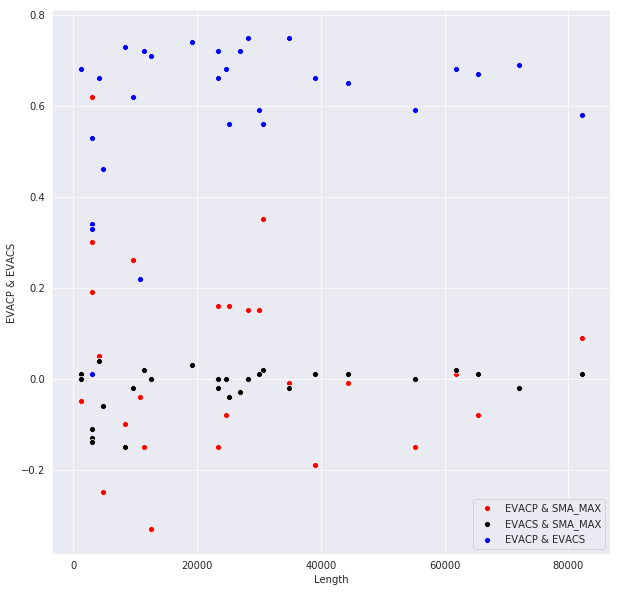

In [256]:
corr_scatterplot(temp_corr_data)

Further analysis is needed on these particular signals. Maybe, Feature Selection will provide better answer. Though, both (EVACP and EVACS) have medium correlation. EVACP should be given priority as it is a derived value of EVVSP.

---
## EVHTR (Heater Request) and EVOAS (Outside Air Termperature)

In [9]:
data[data["EVHTR"] == 1]["tp"].unique()

array([ 1,  2, 25, 26, 27, 31, 32, 33, 34, 35])

In [14]:
temp_df = trip_data(data, 26, "EVHTR", "EVVSP") 
len(temp_df)

12600

In [15]:
bbv = data[data["tp"] == 36]

bbv_discrete = []
for i in range(10, len(bbv)):
    x = list(bbv["EVBBV"].iloc[i-10:i])
    if len(set(x)) > 1:
        bbv_discrete.append(1)
    else:
        bbv_discrete.append(0)

In [11]:
len(temp_df[temp_df["EVHTR"] == 1])

9600

In [17]:
temp_df.sample(5)

,EVHTR,EVOAS,EVSMA_MAX,EVSMA_EWMA
306544,0,14.0,88.7,0.000241
304898,0,14.0,89.4,0.000867
297109,1,12.5,92.0,0.000495
305737,0,14.0,89.1,0.000375
307766,1,14.0,88.4,0.000068


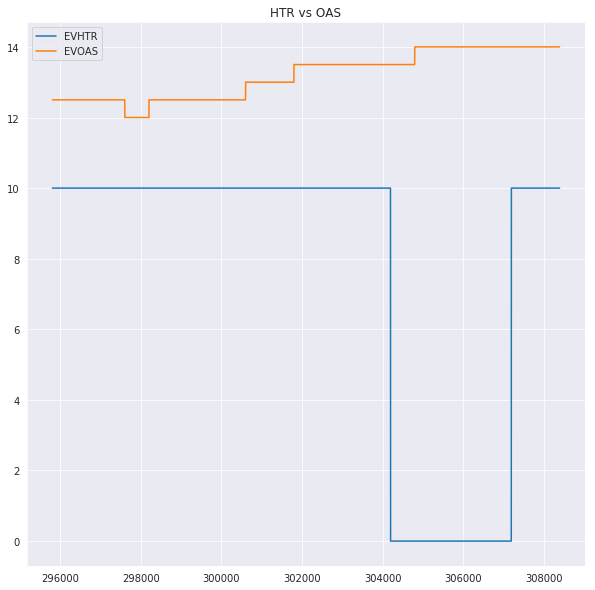

In [12]:
plt.plot(temp_df["EVHTR"]*10, label = "EVHTR")
plt.plot(temp_df["EVOAS"], label = "EVOAS")
plt.legend()
plt.title("HTR vs OAS")
plt.show()

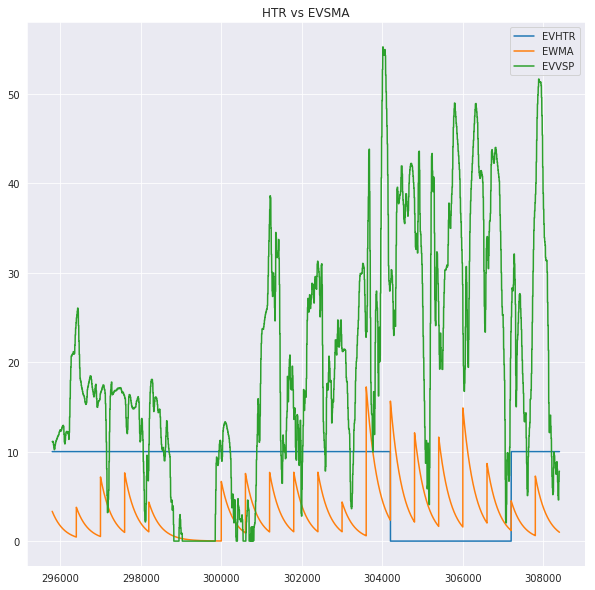

In [16]:
plt.plot(temp_df["EVHTR"]*10, label = "EVHTR")
plt.plot(temp_df["EVSMA_EWMA"]*10000, label = "EWMA")
plt.plot(temp_df["EVVSP"])
plt.legend()
plt.title("HTR vs EVSMA")
plt.show()

When the `HTR` is switched ON, we get the rate of change of `EVSMA_EWMA` is increasing. 

In [20]:
a = temp_df[temp_df["EVHTR"] == 1]["EVSMA_EWMA"].values

In [21]:
b = temp_df[temp_df["EVHTR"] == 0]["EVSMA_EWMA"].values

In [22]:
effect_size = cohen_effect_size(b, a)

In [23]:
print(effect_size)

0.9774690035717833


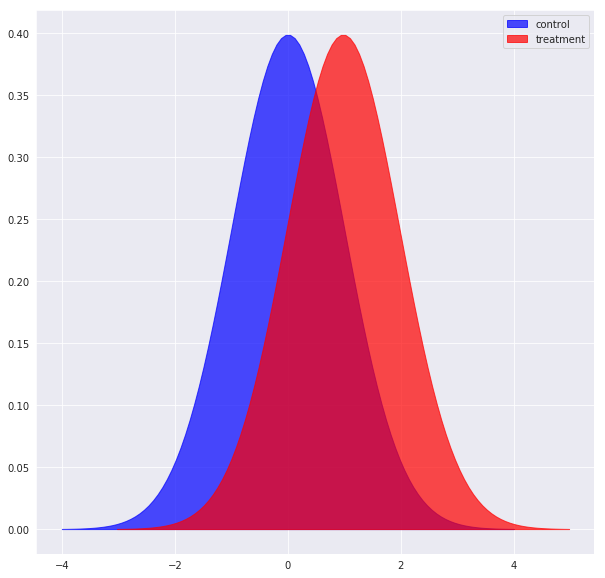

In [24]:
plot_pdfs(effect_size)

In [25]:
temp_df = trip_data(data, 2, "EVHTR", "EVOAS") 
len(temp_df)

24600

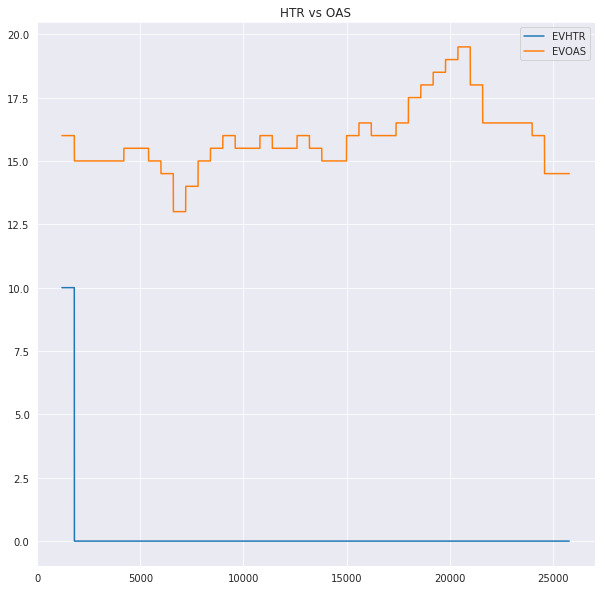

In [26]:
plt.plot(temp_df["EVHTR"]*10, label = "EVHTR")
plt.plot(temp_df["EVOAS"], label = "EVOAS")
plt.legend()
plt.title("HTR vs OAS")
plt.show()

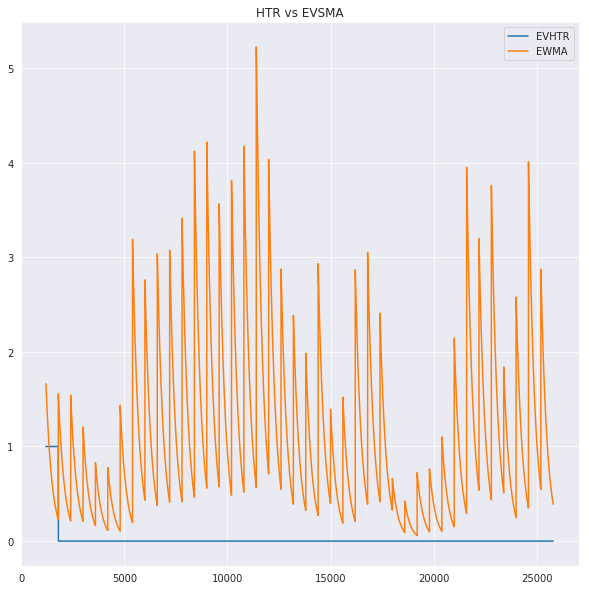

In [27]:
plt.plot(temp_df["EVHTR"], label = "EVHTR")
plt.plot(temp_df["EVSMA_EWMA"]*1000, label = "EWMA")
plt.legend()
plt.title("HTR vs EVSMA")
plt.show()

In [28]:
a = temp_df[temp_df["EVHTR"] == 1]["EVSMA_EWMA"].values
b = temp_df[temp_df["EVHTR"] == 0]["EVSMA_EWMA"].values
effect_size = cohen_effect_size(b, a)
print(effect_size)

0.5605457465519547


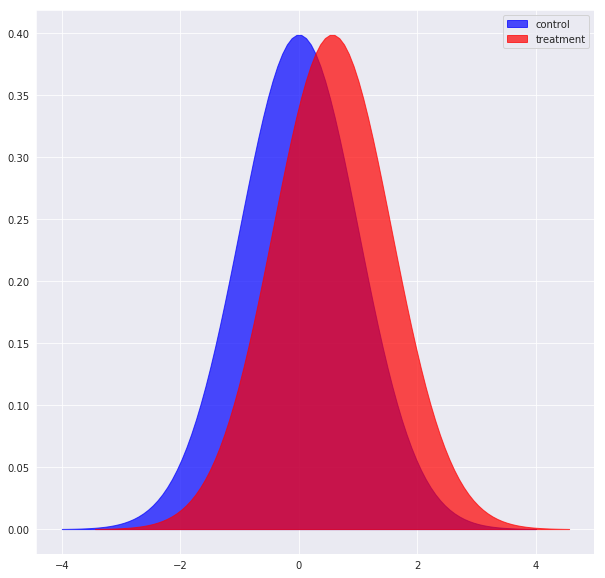

In [29]:
plot_pdfs(effect_size)

When the duration of `HTR` is large, effect size of `HTR` with `EVSMA_EWMA` is visible, when it is small, it is little less, but this is significant.

----
---
-----